## Social Networks Assignment

We begin with some of the notation introduced in the text.

$$
   \begin{array}[t]{llp{5in}}
   d(i,j)     &  &\text{the length of the shortest path between nodes $i$ and $j$}\\
  \text{N}_{j} &  & \text{the (set of) neighbors of node $j$}\\
   \mid \text{N}_{j} \mid &  & \text{the number of neighbors node $j$ has in the graph}\\
   \text{E}(\text{S}) &  & \text{the set of edges for some set of nodes S}\\
   \text{E}(\text{N}_{j}) & & \text{the set of edges among the neighbors of $j$}\\
   \mid \text{E}(\text{N}_{j})\mid & & \text{the number of edges among the neighbors of $j$}\\
   {k \choose 2} &  \frac{k(k-1)}{2} & \text{the number of possible pairs for a set of $k$ things} \\[.05in]
   {\mid \text{N}_{j} \mid \choose 2} &\frac{\mid \text{N}_{j} \mid(\mid \text{N}_{j} \mid-1)}{2} & \text{the number of possible edges connecting neighbors of $j$} \\[.05in]
   \text{APL}(\text{G}) & \frac{1}{{N \choose 2}} \sum_{i,j} d(i,j) &\text{the average path length in graph G, the sum of the shortest paths between all node
                                                   pairs,}\\
                            & & \text{divided by ${{N \choose 2}}$, the number of node pairs in graph G}
   \end{array}
$$


Note that $i$ is not in the neighborhood set $\text{N}_{i}$.
Then the **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as

$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of $i$ divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.

As an example,  consider the following graph (similar to the one discussed in the text):


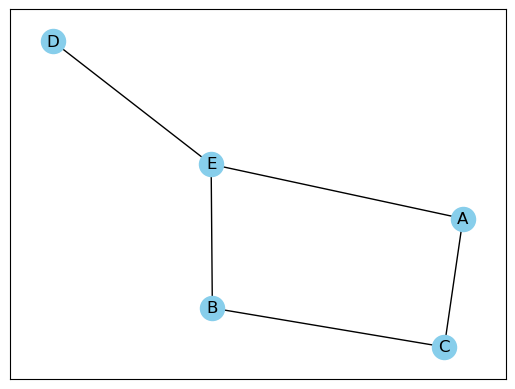

In [221]:
import networkx as nx
G = nx.Graph()


# This is the one we'll start with for this problem set
edges = \
"""
D E
E B
E A
C A
C B
"""
G = nx.parse_edgelist(edges.split('\n'))
nx.draw_networkx(G,node_color='skyblue')

**Q1**

Using `G` as draw above, write out the betweenness centrality calculation for node E, using the
definition of betweenness centrality for a node given in the
text chapter.

We reproduce that definition here, for convenience:

We define the **betweenness centrality** of node $j$, $\text{Betweenness}_{j}$ as

$$
   \begin{array}[t]{l}
   \text{Betweenness}_{j} = \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
   \end{array}
$$

Here $\sigma_{ik}$ is the total number of shortest paths
from $i$ to $k$; and  $\sigma_{ik}(j)$ is the total
number of such paths which pass through $j$.  The expression
to the right of $\sum$ is proportion of all shortest paths
between $i$ and $k$ that pass through $j$.
The symbol $\sum$ indicates
we sum that quantity for various $i$ and $k$, and
the little subscript tells us $i\neq j\neq k$; that is, we find that quantity
for all distinct nodes $i,k$ in the graph that are different from $j$.

And we add up the results.  Roughly what we're calculating is: What proportion
of the shortest paths in the graph pass through $j$? Or what proportion
of the traffic taking a shortest path journey has to pass through $j$. 

To see an example of writing out the calculation (on a different graph!) 
look back at the textbook discussion.


**Solution**


```
Pairs:
     E             |  Not E
   +---------------+
AC |               |   AC       0/1 = 0.0
AD | AED           |            1/1 = 1.0
BD | BED           |            1/1 = 1.0
BA | BEA           |   BCA      1/2 = 0.5
BC |               |   BC       0/1 = 0.0
CD | CBED, CAED    |            2/2 = 1.0
   +---------------+
```

$$
BC(E) = 0+ 1 + 1 + .5 +0 + 1 = 3.5
$$

In [82]:
nx.betweenness_centrality(G,normalized=False)['E']

3.5

In [222]:
nx.betweenness_centrality(G)['E']

0.5833333333333333

**Q2**

How does the betweenness computation for node E in G 
change if we add an edge between C and E as shown in the cell below?


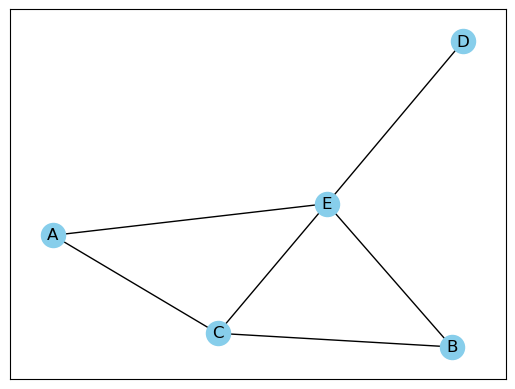

In [85]:
edges2 = \
"""
D E
E B
E A
C A
C B
C E
"""
G2 = nx.parse_edgelist(edges2.split('\n'))
nx.draw_networkx(G2,node_color='skyblue')

**Solution**

```
Pairs:
     E             |  Not E
   +---------------+
AC |               |   AC       0/1 = 0.0
AD | AED           |            1/1 = 1.0
BD | BED           |            1/1 = 1.0
BA | BEA           |   BCA      1/2 = 0.5
BC |               |   BC       0/1 = 0.0
CD | CED           |            1/1 = 1.0
   +---------------+
```

$$
BC(E) = 0+ 1 + 1 + .5 +0 + 1 = 3.5
$$

**Q3**

How does the betweenness computation for node E change if we add an edge between A  and B as shown in the cell below?

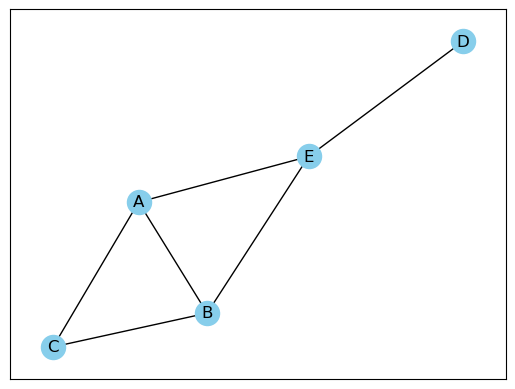

In [84]:
edges3 = \
"""
D E
E B
E A
C A
C B
A B
"""
G3 = nx.parse_edgelist(edges3.split('\n'))
nx.draw_networkx(G3,node_color='skyblue')

**Solution**


```
Pairs:
     E             |  Not E
   +---------------+
AC |               |   AC       0/1 = 0.0
AD | AED           |            1/1 = 1.0
BD | BED           |            1/1 = 1.0
BA |               |   BA       0/1 = 0.0
BC |               |   BC       0/1 = 0.0
CD | CAED,CBED     |            2/2 = 1.0
   +---------------+
```

$$
BC(E) = 0+ 1 + 1 + 0 +0 + 1 = 3
$$


In [83]:
nx.betweenness_centrality(G3,normalized=False)["E"]

3.0

**Q4** What is the **degree centrality** of node E in the graph in Question 2?
Show your calculation.  Use `networkx` to check your calculation (the `degree_centrality`
function is demoed un the using_networkx.ipynb notebook.)

**Solution**

(Degree of E)/(N(G) -1) = 4/(5 - 1) = 1.0

Where N is the size of G


In [91]:
G2.degree['E']#/(len(G2)-1)

4

**Q5** What is the clustering coefficient for node E in the graph in Question 2?
Show your calculation.
Use `networkx` to check your calculation.


The **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as
$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$
The notation $\text{N}_{i}$, read "neighbor set" as explained above, stands for the set of neighbors of $i$
Note that $i$ is not in the neighbor set $\text{N}_{i}$.

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of $i$ divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.

$\mid \text{E}(\text{N}_{i}) \mid$ = (number of E's neighbors that are each other's neighbors)  = 2

$ \mid \text{N}_{i} \mid \choose 2 $  = Number of possible edges among E's neighbors  = 6

CC(E) = 2/6 = .333


In [92]:
nx.clustering(G2)['E']

0.3333333333333333

**Q7** What is the average shortest path length in the graph in Question 2? 
Show your calculations.  Use networkx to check your calculations.
Look [here](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
in the `networkx` docs for a discussion of `nx.average_shortest_path_length`.

**Solution**

```
Pairs:
    SPL
   +---+
AB | 2
AC | 1
AD | 2
AE | 1
BC | 1
BD | 2
BE | 1
CD | 2
CE | 1
DE | 1
   +---+
```

APL = ((4 * 2) + (6*1))10 = 14/10 = 1.4

In [95]:
nx.average_shortest_path_length(G2)

1.4

### More on clustering coefficients

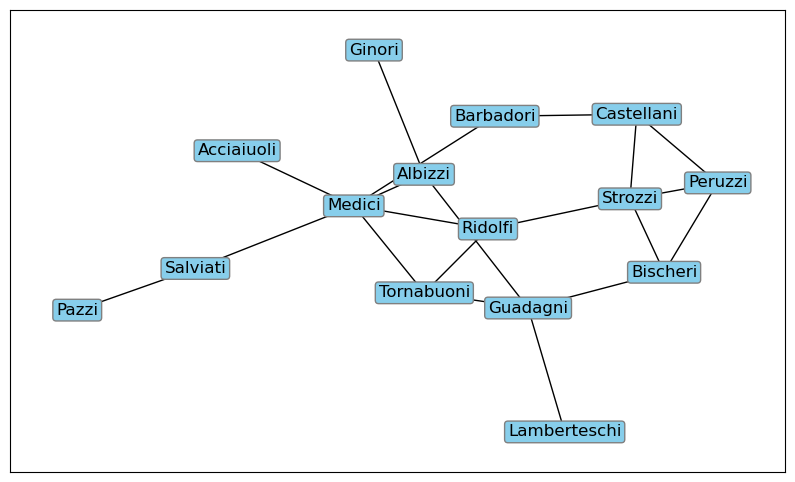

In [217]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6)) 

ff = nx.florentine_families_graph()

nx.draw_networkx(ff, with_labels=True, node_shape = 's', node_color="none", 
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'),
                )

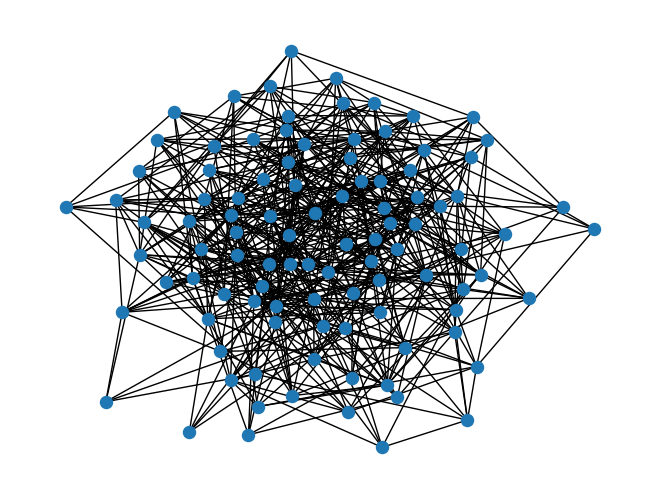

In [216]:
erg = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(erg,node_size=75)

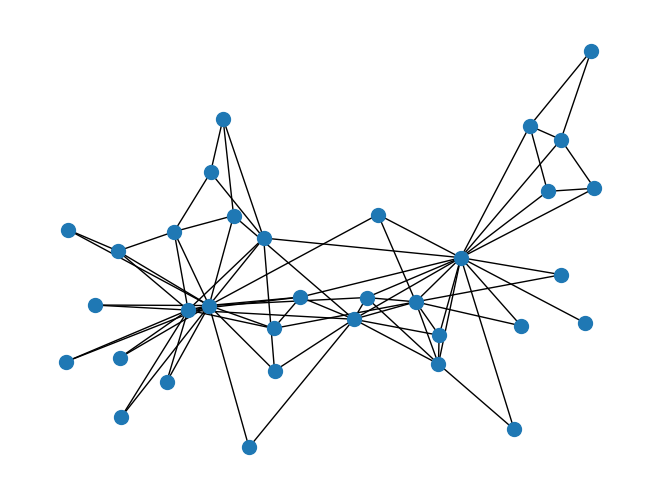

In [215]:
import networkx as nx

kn = nx.karate_club_graph()
nx.draw_spring(kn,node_size=100)

 In the cells below we load three more graphs, Zachary's karate graph,
 the Fl;orentone Families graph, and a random graph


Using `networkx`, compute the clustering coefficent of all three graphs. 

>1. the karate graph;
>2. A random graph;  
>3. the Florentine families graph

Try to **guess** the clustering coefficient of the random graph even before you compute it.  Is the clustering coefficient of the karate graph higher or lower than that of the random graph? Is that what you expect given that social networks are small worlds?

In [219]:
ffc = nx.average_clustering(ff)
knc = nx.average_clustering(kn)
erc = nx.average_clustering(erg)

ffd = nx.density(ff)
knd = nx.density(kn)
erd = nx.density(erg)

print(f"{ffc=:.3f} {knc=:.3f} {erc=:.3f}")

print(f"{ffd=:.3f} {knd=:.3f} {erd=:.3f}")

ffc=0.160 knc=0.571 erc=0.102
ffd=0.190 knd=0.139 erd=0.113


**Solution**: The fact that two karate club member A and B share a friend X makes it much more likely that A and B are friends than that two club members chosen at random are: The average clustering coefficient of kn is much greater than its density. This is a natural feature of many but not all social networks. Consider the Florentine Families graph, where the clustering coeficient is lower than the density. Apparently political alliances are not like friendships.

Finally in the random graph, the average clustering coefficient is almost exactly the same as its density. 
The fact that two random nodes A and B are both connected to C makes it neither more nor less likely that A and B are 
connected.

Alternatively:

In [45]:
def get_dict_average(dd):
    vl = list(dd.values())
    return sum(vl)/len(vl)

def get_dict_average2(dd):
    """
    There's an issue about whether this version is a good
    idea.  Basically there's a lot of overhead
    in creating an array.  So if you're planning
    on using this version of the function a lot,
    timing comparisons with the first version are in order.
    """
    vl = np.array(list(dd.values()))
    return vl.mean()


ffc = get_dict_average(nx.clustering(ff))
knc = get_dict_average(nx.clustering(kn))
erc = get_dict_average(nx.clustering(erg))

print(f"{ffc=:.3f} {knc=:.3f} {erc=:.3f}")

ffc=0.160 knc=0.571 erc=0.125


#### Additional exploratory questions

1.  What is the average clustering value for a complete graph?


> Think about it before scrolling down to the answer below.

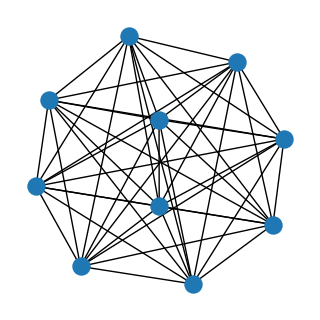

In [79]:
plt.figure(figsize=(3,3)) 
decad = nx.complete_graph(10)
nx.draw_spring(decad,node_size=150)

In [80]:
decad = nx.complete_graph(10)
ddc = get_dict_average(nx.clustering(decad))

print(f"{ddc=:.3f}")

ddc=1.000


2.  Consider the following Watts-Strogatz graph.  What is its average clustering value?

> Think about it before scrolling down to the answer.

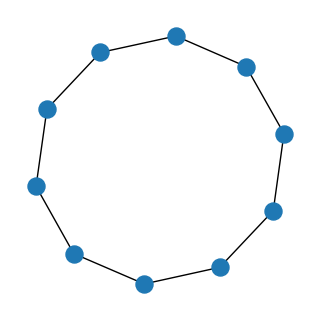

In [81]:
plt.figure(figsize=(3,3)) 

wsg = nx.watts_strogatz_graph(10, 2, 0,seed=47)
#print(nx.triangles(wsg2))
nx.draw_spring(wsg,node_size=150)

In [74]:
wsc = get_dict_average(nx.clustering(wsg))
#wsc = nx.average_clustering(wsg)

print(f"{wsc=:.3f}")

wsc=0.000


3.  Now consider the following Watts-Strogatz graph.  What is its average clustering value?

> Think about it before scrolling down to the answer.

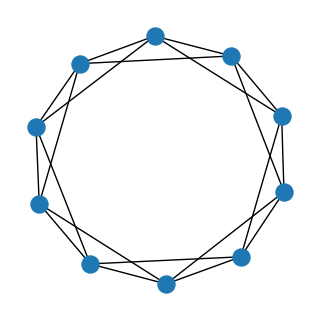

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3,3)) 

wsg2 = nx.watts_strogatz_graph(10, 4, 0,seed=47)
nx.draw_spring(wsg2,node_size=150)

In [76]:
wsc2 = nx.average_clustering(wsg2)

print(f"{wsc2=:.3f}")

wsc2=0.500


### Centrality

**Q8** 

Try using the betweenness centrality and degree centrality measures on the Florentine families graph.  These measures were illustrated in the new_using_networkx.ipynb notebook.  The two measures produce different centrality rankings.   Briefly describe the important differences between the two different centrality rankings
assigned to this graph. Be sure to sort your results for ease of comparison.   

**Solution**

In [150]:
bc = nx.betweenness_centrality(ff)
bc_il = bc.items()
for (nm,sc) in sorted(bc_il,key=lambda x:x[1],reverse=True):
    print(f"{nm:<50} {sc:04.3f}")

Medici                                             0.522
Guadagni                                           0.255
Albizzi                                            0.212
Salviati                                           0.143
Ridolfi                                            0.114
Bischeri                                           0.104
Strozzi                                            0.103
Barbadori                                          0.093
Tornabuoni                                         0.092
Castellani                                         0.055
Peruzzi                                            0.022
Acciaiuoli                                         0.000
Pazzi                                              0.000
Ginori                                             0.000
Lamberteschi                                       0.000


In [151]:
dc = nx.degree_centrality(ff)
dc_il = dc.items()
for (nm,sc) in sorted(dc_il,key=lambda x:x[1],reverse=True):
    print(f"{nm:<50} {sc:04.3f}")

Medici                                             0.429
Strozzi                                            0.286
Guadagni                                           0.286
Castellani                                         0.214
Peruzzi                                            0.214
Ridolfi                                            0.214
Tornabuoni                                         0.214
Albizzi                                            0.214
Bischeri                                           0.214
Barbadori                                          0.143
Salviati                                           0.143
Acciaiuoli                                         0.071
Pazzi                                              0.071
Ginori                                             0.071
Lamberteschi                                       0.071


**Discussion**  This is a good iillustration of the different properties of the two centrality measures.
There is significant, but not perfect, agreement betwen the two centrality measures, somewhat
at the the top of the rankings, and strongly at the bottom.  Notice how some families with fairly
high degree (and therfore fairly high degree centrality), are ranked much lower by betweenness (the Castellanis,
the Strozzis, the Peruzzis).  This is because, despite having a good number of alliances,
those alliances are poorly positioned in the overall graph according to the betweenness metric.


A quantititve measure of the agreement for this graph.

In [160]:
# A classic statistical measure of correlation
from scipy.stats import spearmanr

# You might think you need to do this
# Line up the scores in two sequences
#dc_scores = [dc[f] for f in ff]
#bc_scores = [bc[f] for f in ff]
#spearmanr(dc_scores,bc_scores)

# But this works because python dictionaries are now ordered.
spearmanr(list(dc.values()),list(bc.values()))

SpearmanrResult(correlation=0.7699868011416207, pvalue=0.000785479096242855)

In [224]:
list(bc.values())

[0.0,
 0.521978021978022,
 0.05494505494505495,
 0.02197802197802198,
 0.10256410256410257,
 0.09340659340659341,
 0.11355311355311355,
 0.09157509157509157,
 0.21245421245421245,
 0.14285714285714288,
 0.0,
 0.1043956043956044,
 0.2545787545787546,
 0.0,
 0.0]

#### Word Graph Section

We are going to build a graph that depicts letter-sharing relations in a group
of words then answer some questions about it.

In [162]:
import pandas as pd

graph_wds = ['shade', 'pooch', 'fling', 'brief', 'shank', 'juice',
             'boggy', 'sonny', 'parer', 'glogg', 'vague', 'extra',
             'chalk', 'spate', 'soppy', 'graph', 'prick', 'mixer',
             'steal', 'wages','quick']

rows = [[wd, let, i] for wd in graph_wds for (i,let) in enumerate(wd)]
df = pd.DataFrame(rows,columns=["Word","Letter","Position"])

In [2]:
df[df['Word'] == 'glogg']

,Word,Letter,Position
45,glogg,g,0
46,glogg,l,1
47,glogg,o,2
48,glogg,g,3
49,glogg,g,4


Each row in `df` represents the occurrence of a letter in a word.
There are 105 rows because each of our 21 words has 5 letters.

We will build  a graph `G` whose nodes are the 21 words in `graph_wds`.  Here is
what the graph represents

>**Two words in `G` will be connected if and only if they share a letter**

`G`   could be built without using pandas, but to improve our knowledge
of pandas grouping functionality, we sketch the code that builds the
graph using the `Dataframe` `df` constructed above.  

Your task for **Q1** below will be to write the code that actually builds the
graph.

In [3]:
# Create the Series groupby object using df.  
# You can convert a groupby instance `gb` into a `SeriesGroupBy` instance by doing `gb[col_name]`
# We do that here so that the members of each group will be the words containing the group letter
let_gps = df.groupby('Letter')['Word']   


An alternative grouping strategy used in solution 3 below.  This is a reasonable
way of representing the data that bears on 

> the question of how to weight the edges connecting words

> the question of whether to allow self-loops in the graph

An alternative representation of the data.  Used below for questions involving edge weights.

In [5]:
# Eliminate position column and drop the duplicate rows that result.
df2 = df.iloc[:,:-1].drop_duplicates()
let_gps2 = df2.groupby('Letter')['Word']   

Now the number of rows each word has is the number of distinct letters it has.

In [6]:
df2[df2['Word'] == 'glogg']

,Word,Letter
45,glogg,g
46,glogg,l
47,glogg,o


#### Step 2 Making the word graph

This is correct but less efficient than using the group object,
because buried inside the letter intersection in line 9 there
are a lot of character by character comparisons that are
unnecessary when you use the groups.

It also has the disadvantage of not preparing you for the question on the final
that uses DF groups, where there's no convenient analogue of this
code.

If you did something like this, look at the solutions below it anyway.
They may help on the final.

In [163]:
#### Soln 0 (avoiding groups)
G13 = nx.Graph()

el = []
#Ignore the DataFrame.  Get the word set
wlist = graph_wds 

for (i,word1) in enumerate(wlist):
    wset1 = set(word1)
    for word2 in wlist[i+1:]:
        shared = wset1.intersection(word2)
        if shared:
            G13.add_edge(word1,word2,weight = len(shared))

In [164]:
len(G13), len(G13.edges), G13['vague']['wages'], G13['glogg']['boggy'],

(21, 143, {'weight': 3}, {'weight': 2})

**Soln 1**

In [190]:
import networkx as nx
from collections import defaultdict
from nltk import FreqDist

# Find the word pairs sharing letters

# Placing each word pairs in alphabetical order purely to make counting counting edge pairs easy
# For computing a word weight, we dont want to think `('fling', 'quick')`  and `('quick','fling')`
# are distinct  pairs.

# The .iloc is optional but pandas will complain if you access a series by index w/o iloc
elist = [tuple(sorted((wd,wd2))) for (_let, wd_ser) in let_gps
                                   for (i,wd) in enumerate(wd_ser)
                                     for wd2 in wd_ser.iloc[i+1:]]

G2 = nx.Graph()
#  For the word pair ('vague','wages'), which shares 3 letters, this will add the same edge 3 times
#  but that will have no bad effects
G2.add_edges_from(elist)
print(len(G2),len(G2.edges))

21 149


Soln 1 as a for-loop

In [191]:
elist27 = []
 
for (_let, wd_ser) in let_gps:
    for (i,wd) in enumerate(wd_ser):
        for wd2 in wd_ser.iloc[i+1:]:
            elist27.append(tuple(sorted((wd,wd2))))


Exactly the same list of edges built as with the list comprehension:

In [166]:
elist27 == elist

True

#### Commentary

Understanding the structure of the solution.

Notice that the inner loop is exactly the same computatation 
as we did with exercise 9 (the dancer problem)
in the functions assignment:

**Using the `boys`,`girls` and the `neither` list below,
write another list comprehension that finds **all** the possible dance partners, that is**

> **every pair of guests at the party,** 

**regardless of whether they are boys or girls or neither.
But remember: people can't dance with themselves (at least not for the dances that will
played at this party).**

In [205]:
boys = 'Huey Fred Jason Ed Albert Louie'.split()
girls = 'Susan Paula Barbara Felicia'.split()
neither = 'Lee Sam Kim'.split()
guests = boys + girls + neither

dancers = []
for (i,d1) in enumerate(guests):
         for d2 in guests[i+1:]:
            dancers.append((d1,d2))
print(len(guests), len(dancers))
dancers[:5]

13 78


[('Huey', 'Fred'),
 ('Huey', 'Jason'),
 ('Huey', 'Ed'),
 ('Huey', 'Albert'),
 ('Huey', 'Louie')]

We could write a function that **encapsulates** this computational idea:


In [198]:
def pairs (Ser):
    """
    Ser is a pandas Series instance.
    """
    return [(d1,d2) for (i,d1) in enumerate(Ser) for d2 in Ser.iloc[i+1:]]

def pairs2 (Ser):
    return [(d1,d2) for (i,d1) in enumerate(Ser) for d2 in Ser[i+1:]]

The function `pairs2`  does the same as pairs, but is not restricted to a pandas `Series` (something
that has an `.iloc[]` attribute).

In [225]:
pairs2('abcd')

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

And then we could rewrite Soln 1 as essentially a 1-liner.

In [206]:
G13 = nx.Graph()
G13.add_edges_from([p for (let,S1) in let_gps for p in pairs(S1)])
print(len(G13),len(G13.edges))

21 149


Finally, **instead of writing our own encapsulating function `pairs`** we could import a prefab function  that does exactly the same thing, already provided  by a standard Python module.

In [200]:
from itertools import combinations
list(combinations('abcd',2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

And we could write our one-liner using `combinations`.

In [201]:
G14 = nx.Graph()
G14.add_edges_from([p for (let,S1) in let_gps for p in combinations(S1,2)])
print(len(G14),len(G14.edges))

21 149


**Soln 2**

In [234]:
# An alternative.  Note This is NOT equivalent
# to elist.  But it is a valid interpretation of the problem.
elist2 = []

for (_let, wd_ser) in let_gps:
    # Eliminate duplicate words, whicjh are there because of dupklicate letters
    L = list(set(wd_ser))
    for (i,wd) in enumerate(L):
        for wd2 in L[i+1:]:
            elist2.append(tuple(sorted((wd,wd2)))) 

G3 = nx.Graph()
G3.add_edges_from(elist2)

In [227]:
print(len(G3),len(G3.edges))

21 143


**Soln 3**

In [119]:
# An alternative.  Using let_gps2 is NOT equivalent
# to using let_gps (elist).  Is it equivalent to elist2?
elist3 = [tuple(sorted((wd,wd2))) for (_let, wd_ser) in let_gps2
                                   for (i,wd) in enumerate(wd_ser)
                                     for wd2 in wd_ser.iloc[i+1:]]


G4 = nx.Graph()
G4.add_edges_from(elist3)

In [120]:
len(G2),len(G3),len(G4),len(G2.edges),len(G3.edges),len(G4.edges)

(21, 21, 21, 149, 143, 143)

In [121]:
print(len(elist),len(elist2),len(elist3),)

269 228 228


**Extra Credit Soln**

Three variants corresponding to the 3 variant solutions of the main problem.

In [236]:
# let's keep track of how many letters each word pair shares in the weight attribute
# FreqDist counts the number of times each pair in elist occurs.
# edge_weights:  (w1,w2) |->  num letters shared (if > 0)
# FreqDist('abracadabra') => {'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1}
edge_weights = FreqDist(elist)
edge_weights2 = FreqDist(elist2)
edge_weights3 = FreqDist(elist3)


# Using the edge_weights dict, make each edge's weight an edge attribute in G2
nx.set_edge_attributes(G2, edge_weights, "weight")
nx.set_edge_attributes(G3, edge_weights2, "weight")
nx.set_edge_attributes(G4, edge_weights3, "weight")

In [210]:
edge_weights['vague','wages']

3

#### Thinking about the weighting of the edges

Intuition: the weight of an edge is equal to the number of shared letters.

In [62]:
G2['vague']['wages']

{'weight': 3}

Solutions 2 and 3 yield completely equivalent weightings of the edges.

In [61]:
edge_weights2 == edge_weights3

True

Solution 1 is different from both.

In [62]:
edge_weights == edge_weights2

False

Look at the edge weights in solution 1.  Why does the next case exist?  

Isn't the largest number of letters that can be shared 5?

In [50]:
edge_weights[('boggy', 'glogg')]

7

In [230]:
G2['vague']['wages']

{'weight': 3}

Certain letter groups contain duplicates because the letter defining the group
occurs more than once in certain words:

In [8]:
let_gps.get_group('g')

14    fling
32    boggy
33    boggy
45    glogg
48    glogg
49    glogg
52    vague
75    graph
97    wages
Name: Word, dtype: object

In [49]:
let_gps.get_group('o')

6     pooch
7     pooch
31    boggy
36    sonny
47    glogg
71    soppy
Name: Word, dtype: object

In contrast, using the second way of grouping:

In [63]:
let_gps2.get_group('g')

14    fling
32    boggy
45    glogg
52    vague
75    graph
97    wages
Name: Word, dtype: object

In [64]:
let_gps2.get_group('o')

6     pooch
31    boggy
36    sonny
47    glogg
71    soppy
Name: Word, dtype: object

**Q2** Draw your letter graph with labels to show the words.  To get your labels
to show up nicely you should look at the networkx notebook and modify the
code that draws the Florentine Families Graph with `node_shape='s'` and a
`bbox` argument.

**Solution** (applies to extra credit 2 as well):  
The following code use both line thickness and color (with a color map) to display edge weights.
As a visual display, the primary issue is that it can be difficult to know what nodes an edge connects in
a dense graph like this. Also, it would also be good at add a color bar to make it clear what each color
means.

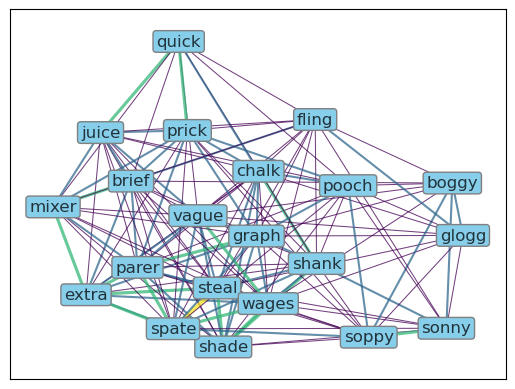

In [237]:

import matplotlib as mpl
import numpy as np
import networkx as nx

GG=G3
# To reflect edge weight in edge color & weight
ec = .75 * np.array(list(nx.get_edge_attributes(GG,'weight').values()))
width = ec

nx.draw_networkx(GG, with_labels=True, node_shape = 's', node_color="none", 
                 edge_color=ec,cmap=mpl.colormaps['coolwarm'], 
                 bbox=dict(facecolor="skyblue", edgecolor='gray', 
                           boxstyle='round,pad=0.2'),
                 alpha=.75,width=width)

Some people did something like
this. A little more complicated, and not 
in line with the instructions (use color or line thickness), but it doesn't look bad.

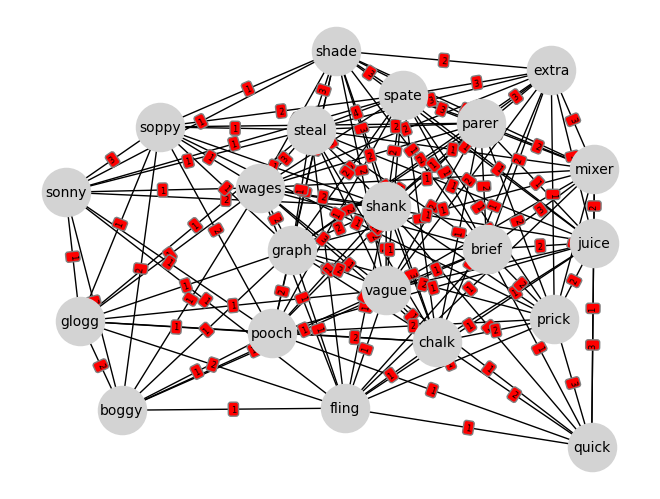

In [142]:
GG = G3

pos = nx.spring_layout(GG,seed=48)
nx.draw(
    GG, pos, edge_color='black', width=1, linewidths=1,
    node_size=1200, font_size=10, node_color='lightgray', with_labels=True,
)
s = nx.draw_networkx_edge_labels(GG, pos, 
                                 edge_labels=nx.get_edge_attributes(G, "weight"), 
                                 font_size=6,
                                 bbox=dict(facecolor="red", edgecolor='gray', boxstyle='round,pad=0.3'))

####  To be used by the instructor only 

Skip this cell unless you have a good reason for wanting a local copy of your graph
(for example, you've installed gephi and you want to display it there).

In [88]:
##  Note this needs to be moved to python_for_ss/networks/ 
##  Checkin for github will then put it in the right place.
nx.write_gml(G2, 'social_networks_assignment_word_graph.gml')

**Q3**   Use the graph as a dictionary to retrieve all the nodes connected to `"quick"`.
(NB:  You can do this with `G2.neighbors('quick')` but use `G2` as a dictionary instead).

In [70]:
G2['quick']

AtlasView({'pooch': {'weight': 1}, 'juice': {'weight': 3}, 'chalk': {'weight': 2}, 'prick': {'weight': 3}, 'fling': {'weight': 1}, 'brief': {'weight': 1}, 'mixer': {'weight': 1}, 'shank': {'weight': 1}, 'vague': {'weight': 1}})

**Q3** Find the three words with the highest betweenness centrality in `G`.

In [212]:
bc_il = sorted(list(nx.betweenness_centrality(G2).items()),key=lambda x:x[1], reverse=True)
bc_il[:3]

[('wages', 0.030378276694066165),
 ('graph', 0.02860218728639781),
 ('vague', 0.02694886984360668)]

**Q3** Find the three words with the highest degree centrality in `G`.

What word has the lowest degree centrality?

In [213]:
dc_il = sorted(list(nx.degree_centrality(G2).items()),key=lambda x:x[1], reverse=True)
print(dc_il[:3])
print()
print(dc_il[-1])

[('parer', 0.8500000000000001), ('graph', 0.8500000000000001), ('wages', 0.8500000000000001)]

('quick', 0.45)


In [154]:
nx.degree(G2)

DegreeView({'shade': 15, 'shank': 15, 'parer': 17, 'vague': 16, 'extra': 13, 'chalk': 15, 'spate': 16, 'graph': 17, 'steal': 16, 'wages': 17, 'brief': 14, 'boggy': 11, 'pooch': 15, 'juice': 14, 'prick': 13, 'quick': 9, 'mixer': 13, 'fling': 14, 'glogg': 12, 'sonny': 12, 'soppy': 14})

**Q4** What is the average clustering coefficient of `G`?  How does it compare to the
average clustering coefficient of the social network graphs Florentine Families and
Zachary's Karate Club (computed in a previous problem)?

The word graph has the highest average clustering (.721). This is related to two facts:

(1) How the word graph is defined.   
Each subgraph defined by a letter is a complete graph with clustering coefficient (CC) 1.0.
While the overall average CC isn't 1 (because connecting two complete subgraphs
doesn't generally yield a complete graph), all the perfectly connected subgraphs contribute
toward a high average CC.  

(2) The word graph is extremely dense (.68).  This
is unlike the social network `ff` and `kn`. If your probability of knowing any random person in the world
was .68, you'd live in a very different world (and you'd be very busy).  

The result is that fact that two words share a letter with a third word  makes
them only a little more likely to share a letter with each other than two random nodes.

On the other hand, the average clustering coefficient of `kn`
is much greater than its density.  The fact that two karate club member A and B share a friend X  makes
it much more likely that A and B are friends than that two club members
chosen at random are:   This is a feature of **most** social networks.

As an example of a social network 
where the clustering coeficient is lower than the density,
consider the Florentine Families graph.  Note that the links
in this graph do not represent friendships.  They represent
marriage alliances in a society where such alliances
were tantamount to a political alliance.  Apparently
political alliances are not like friendships.

In [123]:
kn = nx.karate_club_graph()
ff = nx.florentine_families_graph()

print(f"Density {nx.density(G3):.3f} {nx.average_clustering(G3)=:.3f}")
print(f"Density {nx.density(kn):.3f} {nx.average_clustering(kn)=:.3f}")
print(f"Density {nx.density(ff):.3f} {nx.average_clustering(ff)=:.3f}")

Density 0.681 nx.average_clustering(G3)=0.721
Density 0.139 nx.average_clustering(kn)=0.571
Density 0.190 nx.average_clustering(ff)=0.160
